In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

***Exercise 1***

In [ ]:
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_square.csv'
data = pd.read_csv(url)
data.rename(columns = {'Diện tích':'Area', 'Giá nhà':'Price'}, inplace = True)
data

,Area,Price
0,30.0000,-100.0000
1,32.4138,-190.7250
2,34.8276,-269.7980
3,37.2414,-337.2180
4,39.6552,-392.9850
5,42.0690,-437.0990
6,44.4828,-469.5600
7,46.8966,-490.3690
8,49.3103,-499.5240
9,51.7241,-497.0270


In [ ]:
%matplotlib inline

Estimated coefficients : 
b_0 = -1788.5078219018988 
b_1 = 30.00003628567024

Model:


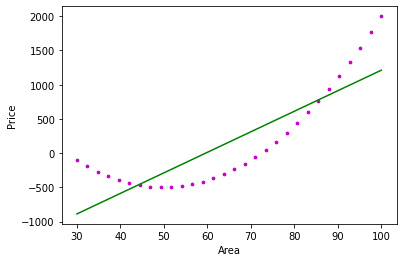

In [ ]:
def estimate_coef(x, y):
    # number of observations (points)
    n = np.size(x)
    # mean of X and Y vector
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    # deviation of x
    SS_xy = np.sum(x*y) - n*x_bar*y_bar
    SS_xx = np.sum(x*x) - n*x_bar*x_bar
    # coefficients
    b_1 = SS_xy / SS_xx
    b_0 = y_bar - b_1*x_bar
    
    return (b_0, b_1)
    
def plot_regression_line(x, y, b):
    # show the actual points as scatter plot
    plt.scatter(x, y, color = "m", marker = ".", s =30)
    y_pred = b[0] + b[1]*x
    # plot the regression line
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.show()
    
def main():
    x = data['Area']
    y = data['Price']
    
    b = estimate_coef(x, y)
    print("Estimated coefficients : \nb_0 = {} \nb_1 = {}".format(b[0], b[1])) 
    
    print("\nModel:")
    plot_regression_line(x, y, b)
    
if __name__ == "__main__":
    main()

***Exercise 2***

(-2.0, 2.0)

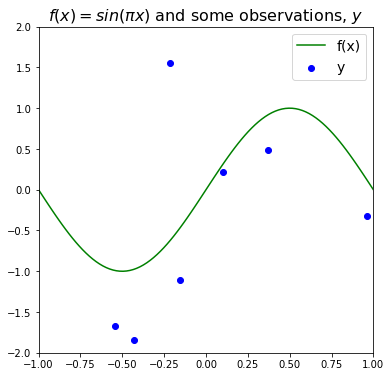

In [ ]:
np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'green'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTISIZE = 16
N_OBSERVATIONS = 10
NOISE_STD = 1.

x = 2 * (np.random.rand(N_OBSERVATIONS) - .5)
x_grid = np.linspace(-1, 1, 100)

def f(x):
    """Base function"""
    return np.sin(x *np.pi)

def sample_fx_data(shape, noise_std=NOISE_STD):
    return f(x) + np.random.randn(*shape) * noise_std

def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    y = y if y is not None else sample_fx_data(x.shape)
    fig, axs = plt.subplots(figsize=(6, 6))
    plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
    plt.scatter(x, y, marker = "o", color = "b", label='y')

# plot the data
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = sin(\pi x)$ and some observations, $y$', fontsize=16)
plt.xlim([-1, 1])
plt.ylim([-2, 2])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

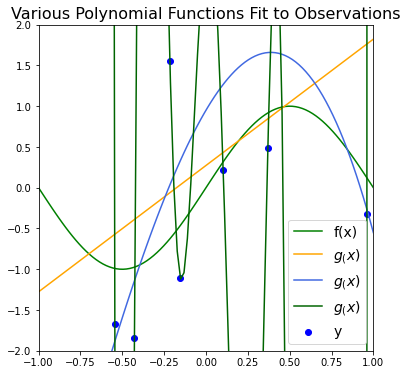

In [ ]:
plot_fx_data(y)

polynomial_degrees = [1, 3, 10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(x, y, degree)
    fit[degree] = np.polyval(theta[degree], x_grid)
    plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_(x)$")
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1, 1])
plt.ylim([-2, 2])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)